In [232]:
%matplotlib inline
import pandas as pd
import json
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

#Load dataset
data = pd.read_json("outputSplit.txt", lines=True)
data.head()

,cgp,cts,fdt,ldt,nd,pg,sid,sts-md,sts-mn,thc-md,thc-mn
0,0.0,0.0,1.552026e+12,1.552028e+12,72,/Guide/iPhone+6s+LCD+and+Digitizer+Replacement...,cjsznskfw00003feb7uj4xkpq,0.0,0.000000,0.0,0.000000
1,0.0,0.0,1.552025e+12,1.552030e+12,3777,/Guide/Details+for++iPhone+7+PCB+Diagram/67315,cjszfhxwv00001ue6vjye28mz,382.0,382.000000,0.0,0.000000
2,0.0,0.0,1.552026e+12,1.552033e+12,3758,/Teardown/Dell+XPS+13+Teardown/36157,cjszh8ph9000026e65loxhols,0.0,0.000000,0.0,0.000000
3,0.0,7.0,1.552026e+12,1.552037e+12,2795,/Teardown/iPad+Pro+11-Inch+Teardown/115457,cjszmn8vc00003mdyqmntbqto,20.0,508.944444,1.0,1.042553
4,0.0,1.0,1.552026e+12,1.552042e+12,4251,/Teardown/Bose+QuietComfort+35+PARTIAL+Teardow...,cjszl6yih00003ae2ilfj9ske,7.0,23.000000,0.0,1.933333


In [233]:
# Rename the columns to be more readable
data.columns = ["Gave Points", "Comments Time", "First Time", "Last Time", "Data Number", "Page Title", "Session ID", "Median Step Time", "Mean Step Time", "Median Hover Time", "Mean Hover Time"]

#Keep only entries with mean step times between 0 and 5,000
clean_data = data[(data['Mean Step Time'] > 5) & (data['Mean Step Time'] < 5000)]
clean_data = clean_data[(clean_data['Comments Time'] < 5000)]
clean_data = clean_data[(clean_data['Median Step Time'] > 5)]

#Shape of the data before
print(data.shape)

#Shape of the data after cleaning
print(clean_data.shape)

(140834, 11)
(27238, 11)


In [234]:
## Some columns aren't useful to us when analyzing data trends. Let's remove them.
simplified_data = clean_data.drop(columns = ['First Time', 'Last Time', 'Data Number', 'Page Title', 'Session ID'])
simplified_data[:10]

,Gave Points,Comments Time,Median Step Time,Mean Step Time,Median Hover Time,Mean Hover Time
1,0.0,0.0,382.0,382.000000,0.0,0.000000
3,0.0,7.0,20.0,508.944444,1.0,1.042553
4,0.0,1.0,7.0,23.000000,0.0,1.933333
14,0.0,1.0,281.0,253.333333,5.0,5.709677
17,0.0,26.0,23.0,24.000000,3.0,3.300000
19,0.0,2.0,40.0,63.321429,2.0,2.962963
23,0.0,2.0,8.0,9.000000,0.0,0.000000
33,0.0,1.0,7.0,19.000000,0.0,0.000000
34,0.0,1.0,6.5,12.277778,2.0,2.893617
37,0.0,11.0,20.0,56.680000,0.0,0.200000


In [235]:
# Things are looking better.  Let's round some of these numbers to make them more readable.

simplified_data = round(simplified_data, 3)
simplified_data[:10]

,Gave Points,Comments Time,Median Step Time,Mean Step Time,Median Hover Time,Mean Hover Time
1,0.0,0.0,382.0,382.000,0.0,0.000
3,0.0,7.0,20.0,508.944,1.0,1.043
4,0.0,1.0,7.0,23.000,0.0,1.933
14,0.0,1.0,281.0,253.333,5.0,5.710
17,0.0,26.0,23.0,24.000,3.0,3.300
19,0.0,2.0,40.0,63.321,2.0,2.963
23,0.0,2.0,8.0,9.000,0.0,0.000
33,0.0,1.0,7.0,19.000,0.0,0.000
34,0.0,1.0,6.5,12.278,2.0,2.894
37,0.0,11.0,20.0,56.680,0.0,0.200


Text(0.5, 0.98, 'Scatter-matrix for each input variable')

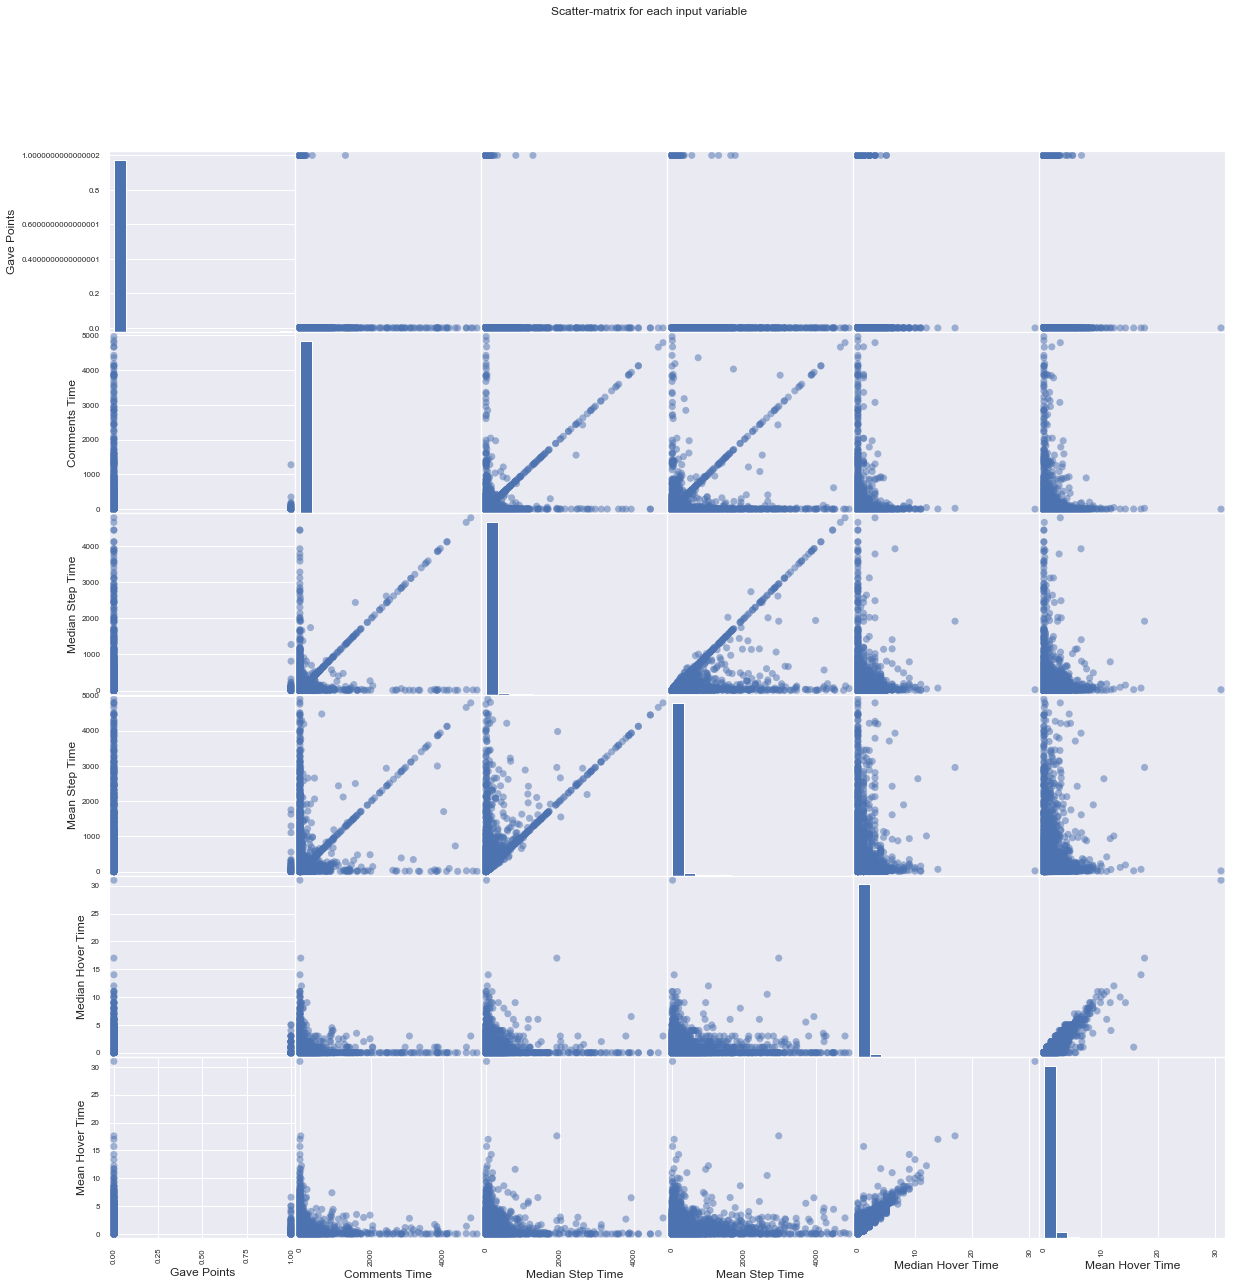

In [236]:
# Much better.  Now let's take a look at the data.
# Here is a scatter plot matrix comparing all of our variables.

from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['Gave Points', 'Comments Time', 'Median Step Time', 'Mean Step Time', 'Median Hover Time', 'Mean Hover Time']
X = simplified_data[feature_names]
scatter = pd.plotting.scatter_matrix(X, marker = 'o', s=50, hist_kwds={'bins':15}, figsize=(20,20))
plt.suptitle('Scatter-matrix for each input variable')

Text(0.5, 0.98, 'Scatter-matrix on four variables')

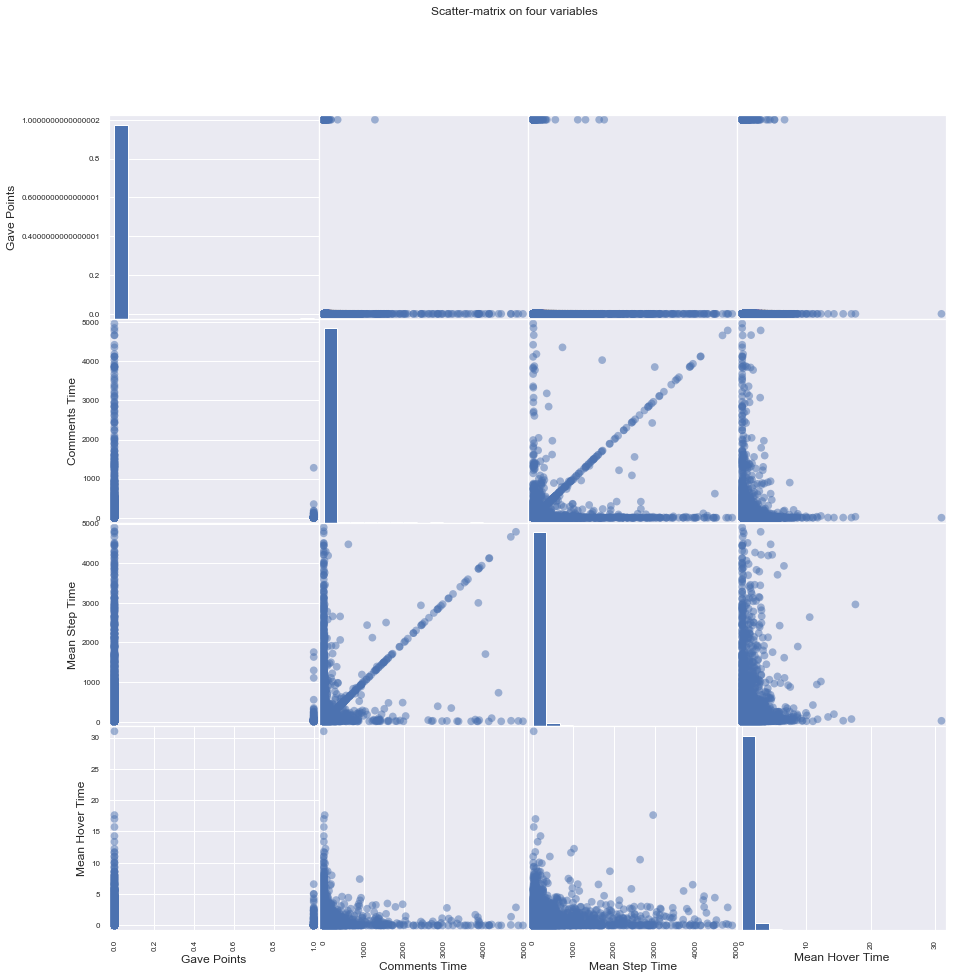

In [237]:
# Much better.  Now let's take a look at the data.
# Here is a scatter plot matrix comparing all of our variables.

from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['Gave Points', 'Comments Time', 'Mean Step Time', 'Mean Hover Time']
X = simplified_data[feature_names]
scatter = pd.plotting.scatter_matrix(X, marker = 'o', s=60, hist_kwds={'bins':15}, figsize=(15,15))
plt.suptitle('Scatter-matrix on four variables')

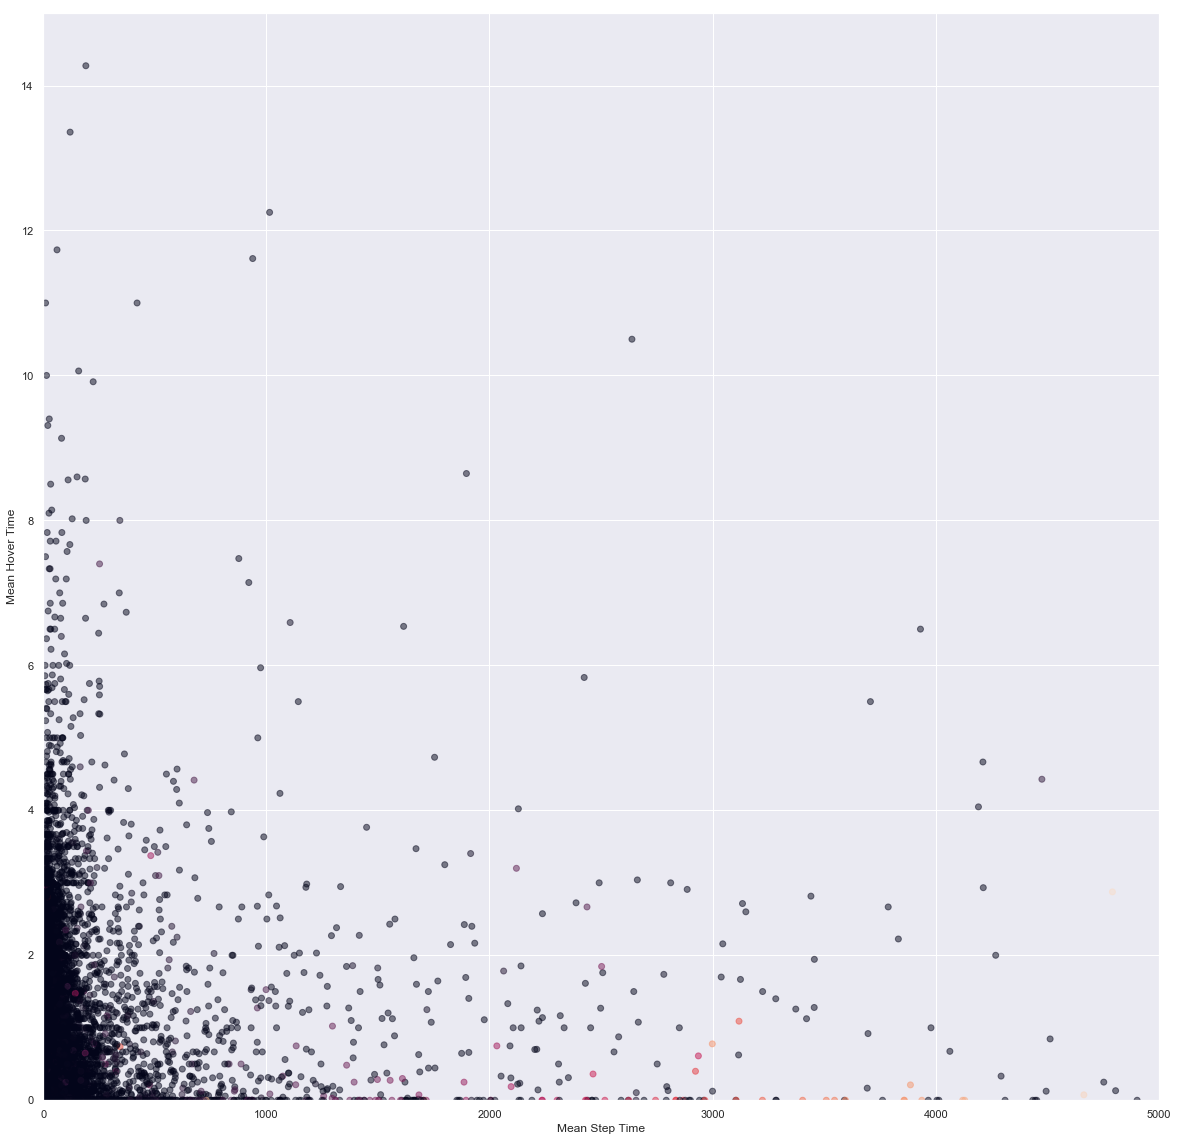

In [238]:
x = simplified_data["Mean Step Time"]
y = simplified_data["Mean Hover Time"]
size = simplified_data["Gave Points"]
colors = simplified_data["Comments Time"]

plt.figure(figsize=(20,20))
plt.scatter(x, y, c = colors, alpha = 0.5)
plt.ylabel('Mean Hover Time')
plt.xlabel('Mean Step Time')
plt.xlim(0, 5000)
plt.ylim(0, 15)
plt.show()

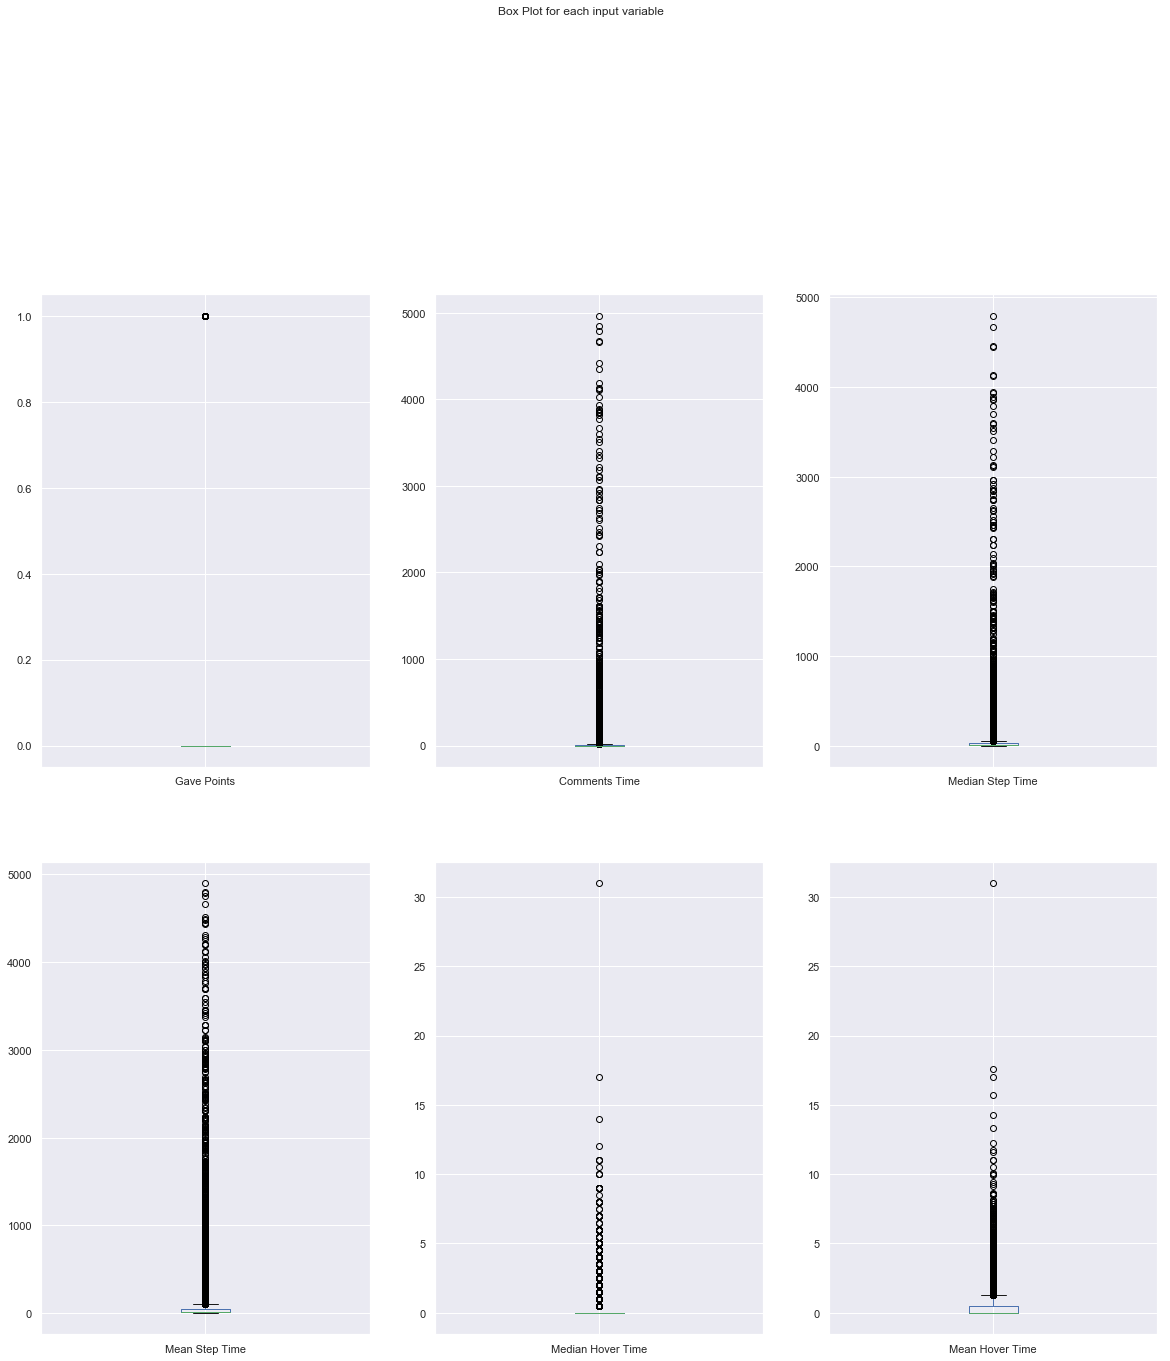

In [239]:
simplified_data.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(20,40), 
                                        title='Box Plot for each input variable')
plt.savefig('clean_box')
plt.show()

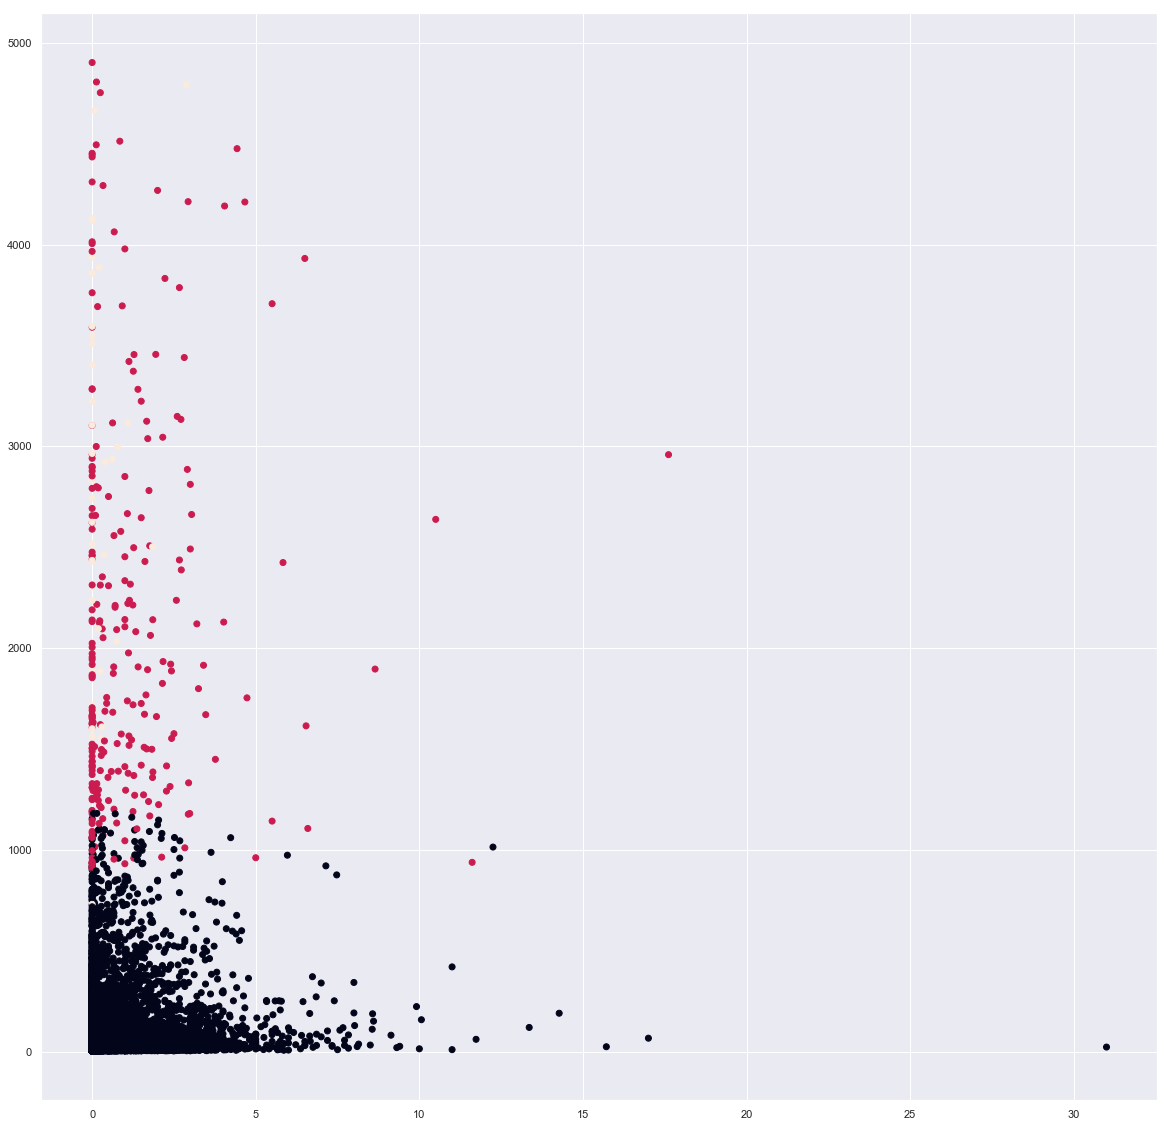

In [251]:
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans

# Declaring Model
model = KMeans(n_clusters=3)

# Fitting Model
model.fit(simplified_data.loc[:, :])

# Prediction on the entire data
all_predictions = model.predict(simplified_data.loc[:, :])

# Printing Predictions
#print(all_predictions)

x_axis = simplified_data.loc[:, "Mean Hover Time"]  # Avg time spent viewing each step
y_axis = simplified_data.loc[:, "Mean Step Time"]  # Avg num views per picture

data_clusters = simplified_data
data_clusters['Cluster'] = all_predictions

# Plotting
plt.figure(figsize=(20,20))
plt.scatter(x_axis, y_axis, c=all_predictions)
plt.show()

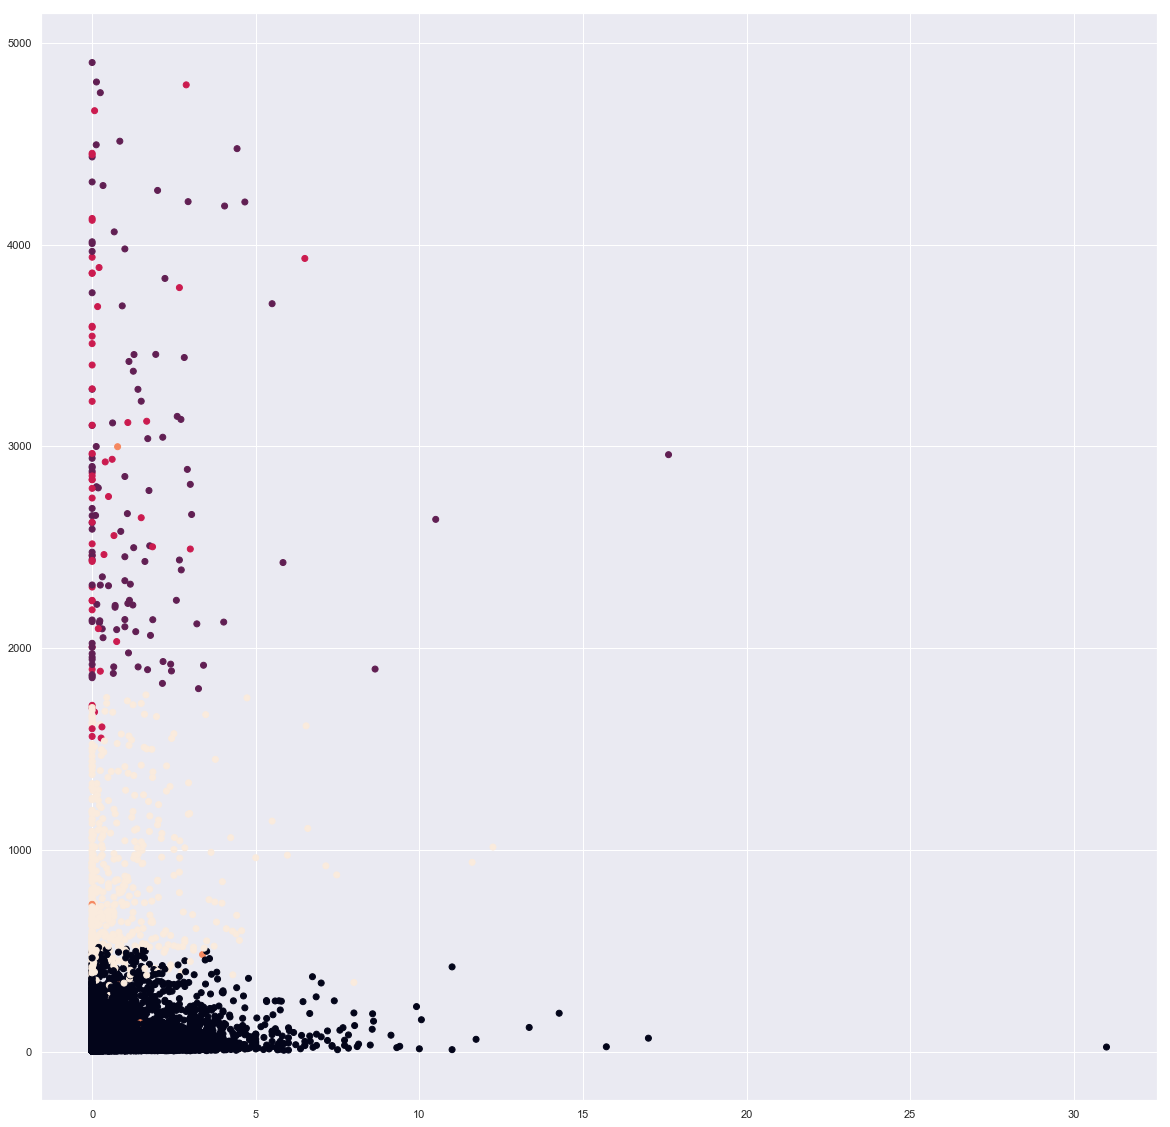

In [253]:
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans

no_points = simplified_data.drop(columns = "Gave Points")

# Declaring Model
model = KMeans(n_clusters=5)

# Fitting Model
model.fit(no_points.loc[:, :])

# Prediction on the entire data
all_predictions = model.predict(no_points.loc[:, :])

# Printing Predictions
#print(all_predictions)

x_axis = simplified_data.loc[:, "Mean Hover Time"]  # Avg time spent viewing each step
y_axis = simplified_data.loc[:, "Mean Step Time"]  # Avg num views per picture

data_clusters = simplified_data
data_clusters['Cluster'] = all_predictions

# Plotting
plt.figure(figsize=(20,20))
plt.scatter(x_axis, y_axis, c=all_predictions)
plt.show()

In [250]:
no_points.head()

,Comments Time,Median Step Time,Mean Step Time,Median Hover Time,Mean Hover Time,Cluster
1,0.0,382.0,382.000,0.0,0.000,3
3,7.0,20.0,508.944,1.0,1.043,3
4,1.0,7.0,23.000,0.0,1.933,0
14,1.0,281.0,253.333,5.0,5.710,0
17,26.0,23.0,24.000,3.0,3.300,0
